In [1]:
#author: Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
import numpy as np
import matplotlib.pyplot as plt
import random as rn

We study the effect of inexact arithmetic on computation of the exponential series

$$
e^x = 1 + x + \frac{x^2}2 + \frac{x^3}{3!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 + x + \frac{x^2}2 + \ldots \frac{x^n}{n!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{expser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 



In [2]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [3]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist

In [4]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [5]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [6]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

No handles with labels found to put in legend.


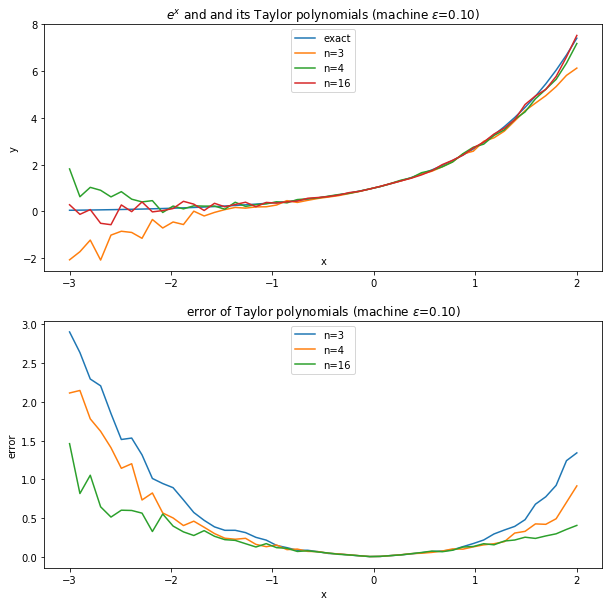

In [7]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

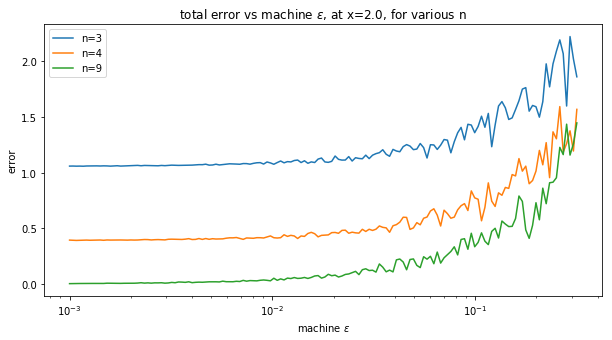

In [8]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

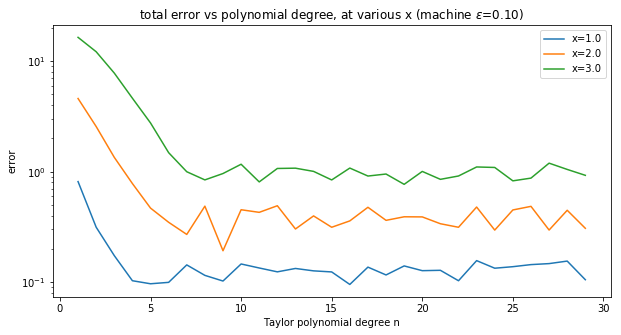

In [9]:
xlist = [1,2,3]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

**Question 2.** We define $N_0$ to be the treshold after which increasing $n$ does not improve the total accuracy anymore. In order to investigate experimentaly how this treshold depends on $x$ and $\varepsilon$, we define the following function:

In [10]:
# Find the minimal n such that increasing n does not increase the total accuracy anymore,
# taking the maximal value over `kmax` runs.
def treshold(x, eps, kmax=50, nmax=40):
    previous_err = float("inf")
    for n in range(1, nmax):
        # take the maximal error over k runs
        err = max([np.abs(np.exp(x) - expser(n, x, eps)) for k in range(1, kmax)])
        if err >= previous_err:
            return n
        else:
            previous_err = err
    return nmax

Using this function, we can now plot $N_0$ for different $x$ and $\varepsilon$.

We observe that the treshold is the lowest at $x=0$. The treshold decreases when $x$ is negative and increases, and it increases when $x$ is positive and increases.

Furthermore, the treshold decreases for large $\varepsilon$, which makes sense: as the terms in the series get closer to $\varepsilon$ (or even smaller than $\varepsilon$), adding more terms does not increase accuracy of the result. Therefore the treshold is reached faster for large $\varepsilon$.

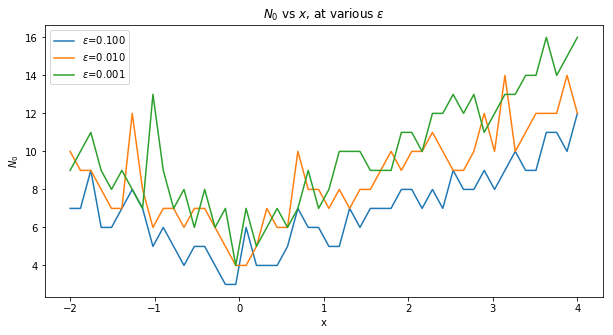

In [54]:
epslist = [0.1, 0.01, 0.001]
xlist = np.linspace(-2, 4, 50)

plt.figure(figsize=(10, 5))
for eps in epslist:
    nlist = [treshold(x, eps) for x in xlist]
    plt.plot(xlist, nlist, label=r'$\varepsilon$=%.3f'%eps)

plt.xlabel('x')
plt.ylabel(r'$N_0$')
plt.title(r'$N_0$ vs $x$, at various $\varepsilon$')
plt.legend()
plt.show()

**Question 3.** We modify the functions that compute the errors in order to study the relative error below.

We see that the relative error $|e^x - \tilde T_n(x)|/e^x$ is very large when $x$ is negative and further from $0$, and that the relative error is small when $x$ is positive and further from $0$. This is expected: the function $e^x$ is very small for negative values therefore the errors are amplified, and $e^x$ is large for positive values.

We do not look at the graph of relative error vs machine $\epsilon$ as the value of $x$ is fixed, so the relative error is simply the total error divided by a constant.

In the relative error vs polynomial degree, we can simply observe that the curves are closer together, which makes sense: the curves for $x=2$ and $x=3$ are scaled down. There is not much interesting to say about it.

Finally, the treshold for which increasing $n$ does not improve the total accuracy anymore is the same whether we are looking at the total error or the relative error so we omit the corresponding graph.

In [12]:
def rel_errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist:
        yy.append((expser(n,x,eps)-np.exp(x))/np.exp(x))
    return yy

In [13]:
def rel_errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append((expser(n,x,eps)-np.exp(x))/np.exp(x))
    return yy

In [14]:
def rel_errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append((expser(n,x,eps)-np.exp(x))/np.exp(x))
    return yy

No handles with labels found to put in legend.


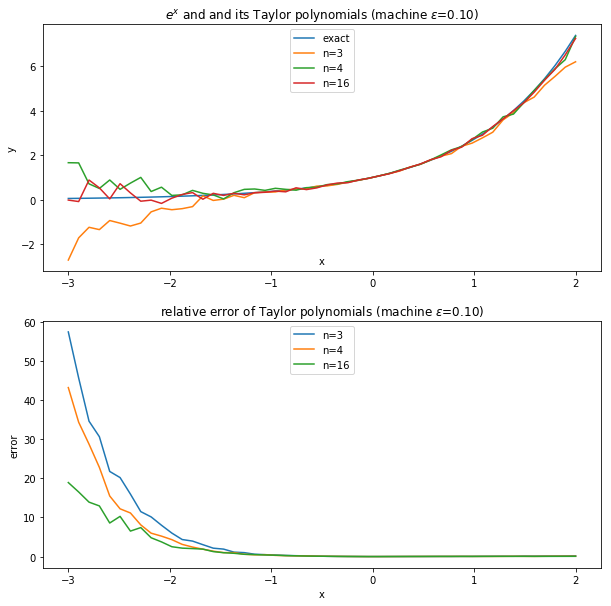

In [15]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(rel_errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(rel_errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

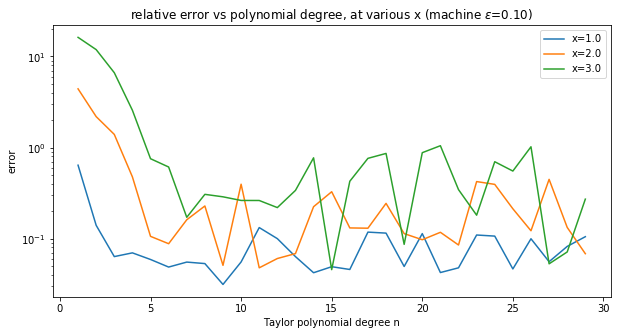

In [17]:
xlist = [1,2,3]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(rel_errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'relative error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

**Question 4.**
We now study the function

$$ \arctan x = x - \frac{x^3}3 + \frac{x^5}5 - \frac{x^7}7 + \frac{x^9}9 - \cdots$$

which we approximate by the Taylor polynomial:

$$T'_n(x) = x - \frac{x^3}3 + \cdots + (-1)^{2n+1} \frac{x^{2n+1}} {2n+1}.$$

Note that the series only converges for $|x| <= 1$ so we restrict the study to $x\in [-1, 1]$. Studying the polynomial outside of the range $[-1,1]$ does not make sense and the "error" would increase with each iteration.

In [18]:
def arctanser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for arctan
# n - degree of the Taylor polynomial
# x - the argument (|x|<=1 is required for convergence)
# eps - relative error in computation of the series terms, modeled by uniform noise
    x = float(x)
    a = x
    b = 1
    y = x
    for i in range(1,n):
        a *= -x*x
        b += 2
        r = 2*eps*rn.random()-eps
        y += (a/float(b))*(1.+r)
    return y

In [19]:
def arctanserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(arctanser(n,x,eps))
    return ylist

In [20]:
def errxlist(n,xlist,eps):
#difference between Tn'(x) and arctan x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(arctanser(n,x,eps)-np.arctan(x))
    return yy

In [21]:
def errelist(n,x,elist):
#difference between Tn'(x) and arctan x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(arctanser(n,x,eps)-np.arctan(x))
    return yy

In [22]:
def errnlist(nlist,x,eps):
#difference between Tn'(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(arctanser(n,x,eps)-np.arctan(x))
    return yy

No handles with labels found to put in legend.


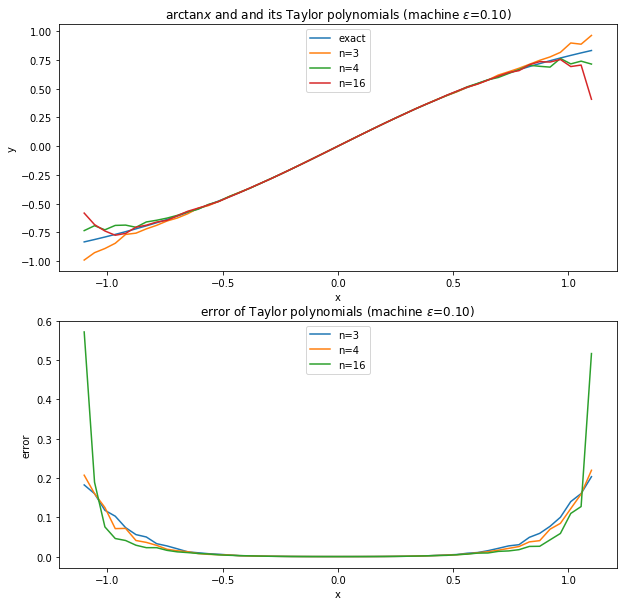

In [50]:
xlist = np.linspace(-1.1, 1.1, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.arctan(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,arctanserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$\arctan x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
#ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

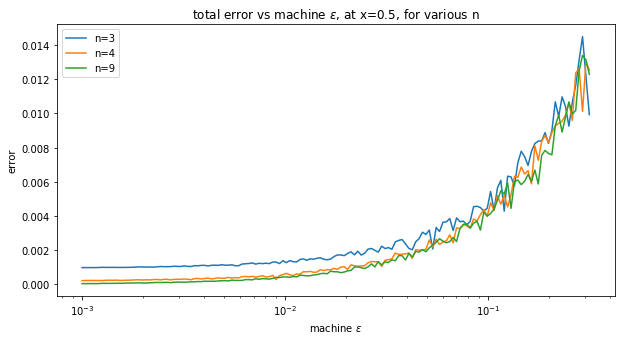

In [24]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=0.5
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

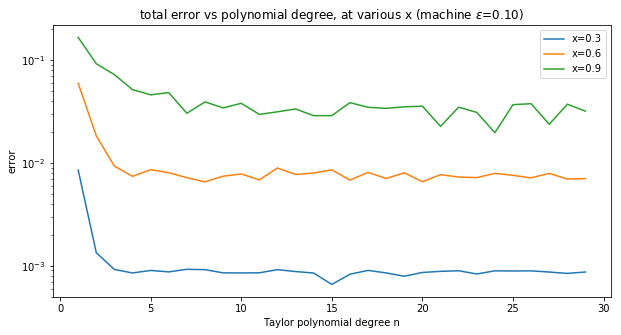

In [52]:
xlist = [0.3, 0.6, 0.9]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

We define $N_0$ as before, i.e. $N_0$ is the treshold after which increasing $n$ does not improve the total accuracy anymore. In order to investigate experimentaly how this treshold depends on $x$ and $\varepsilon$, we use the following function:

In [56]:
# Find the minimal n such that increasing n does not increase the total accuracy anymore,
# taking the maximal value over `kmax` runs.
def treshold(x, eps, kmax=100, nmax=40):
    previous_err = float("inf")
    for n in range(1, nmax):
        # take the maximal error over k runs
        err = max([np.abs(np.arctan(x) - arctanser(n, x, eps)) for k in range(1, kmax)])
        if err >= previous_err:
            return n
        else:
            previous_err = err
    return nmax

We can now plot $N_0$ for different $x$ and $\varepsilon$.

We see that the treshold is very small for values close to $0$. Indeed, the convergence of the Taylor polynomial for $\arctan x$ is very fast for $x$ close to $0$. As we go closer to $1$ and $-1$, the treshold gets larger and larger.

Similarly to what we observed with $e^x$, the treshold is smaller for smaller $\varepsilon$.

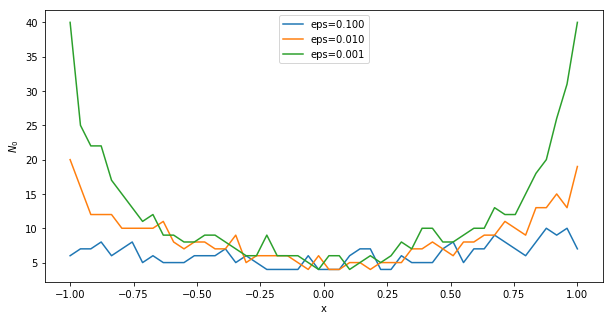

In [57]:
epslist = [0.1, 0.01, 0.001]
xlist = np.linspace(-1, 1, 50)

plt.figure(figsize=(10, 5))
for eps in epslist:
    nlist = [treshold(x, eps) for x in xlist]
    plt.plot(xlist, nlist, label='eps=%.3f'%eps)

plt.xlabel('x')
plt.ylabel(r'$N_0$')
plt.legend()
plt.show()

We now study the relative error. We first redefine the error functions to be relative.

We observe that the relative error is very low in all of the interval $[-1, 1]$.

Indeed, for values close to $0$ the convergence is very fast, so even if we are dividing by a value close to $0$ the relative error remains small.

For values close to $1$ and $-1$, we are dividing by a number whose absolute value is close to $1$ so the relative error behaves similar to the total error.

In [42]:
def rel_errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist:
        yy.append((arctanser(n,x,eps)-np.arctan(x))/np.arctan(x))
    return yy

In [39]:
def rel_errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append((arctanser(n,x,eps)-np.arctan(x))/np.arctan(x))
    return yy

In [40]:
def rel_errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append((arctanser(n,x,eps)-np.arctan(x))/np.arctan(x))
    return yy

No handles with labels found to put in legend.


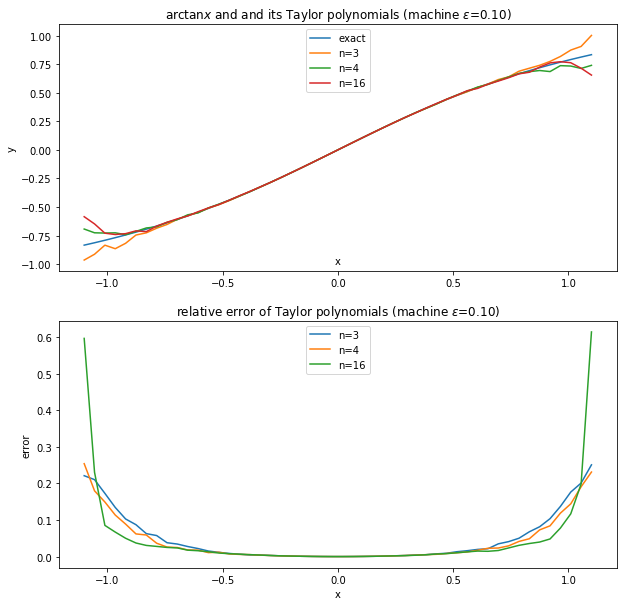

In [46]:
xlist = np.linspace(-1.1, 1.1, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.arctan(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,arctanserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(rel_errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(rel_errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$\arctan x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

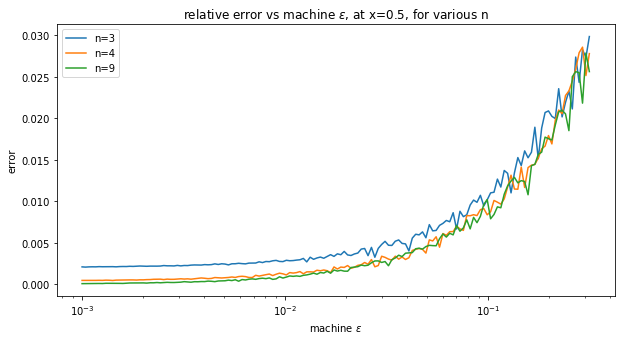

In [47]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=0.5
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(rel_errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'relative error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

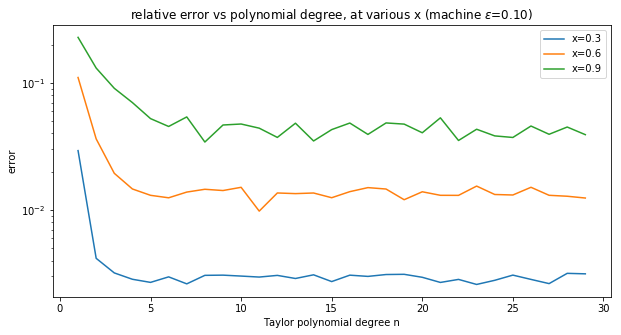

In [48]:
xlist = [0.3,0.6,0.9]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(rel_errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'relative error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()